<!-- Banner / Header -->
<div style="background-color:#141414; padding:20px; border-radius:10px; text-align:center;">
  <h1 style="color:#E50914; font-family:Arial Black, sans-serif; font-size:40px;">
    Deep Learning for Comment Toxicity Detection
  </h1>
  <p style="color:#ffffff; font-size:18px;">
    <b>Using NLP + Streamlit</b><br>
    <i>Inspired by Netflix-style dashboarding </i>
  </p>
</div>

## Project Overview  
<div style="background-color:#222; padding:15px; border-left:5px solid #E50914; border-radius:8px;">
  <span style="color:#ffffff;">
  Toxic comments on social media and online forums negatively impact digital communities.  
  This project builds a <b style="color:#E50914;">deep learning-based toxicity detection system</b> that classifies user comments as toxic or non-toxic in real-time.  
  The final solution is deployed as an interactive <b style="color:#E50914;">Streamlit Web App</b>.
  </span>
</div>

## Objectives  
<div style="background-color:#141414; padding:15px; border-left:5px solid #E50914; border-radius:8px;">
  <ul style="color:white; font-size:16px;">
    <li>Develop a <b style="color:#E50914;">deep learning model</b> to detect toxic comments.</li>
    <li>Perform <b style="color:#E50914;">NLP preprocessing</b> & feature engineering on text data.</li>
    <li>Experiment with <b style="color:#E50914;">BiLSTM, CNN, Transformer-based models</b>.</li>
    <li>Deploy the best-performing model via <b style="color:#E50914;">Streamlit</b>.</li>
  </ul>
</div>

## Business Use Cases  
<div style="background-color:#222; padding:15px; border-left:5px solid #E50914; border-radius:8px; color:white;">
   1. Social Media Platforms → Auto-filter toxic content <br>
   2. Online Communities → Assist moderators <br>
   3. Brand Reputation → Safe environments for ads <br>
   4. E-learning Platforms → Positive learning spaces  
</div>

<div style="background-color:#141414; padding:15px; border-radius:8px; text-align:center;">
  <h3 style="color:#E50914;"> Let's Get Started with Coding Part...</h3>
</div>

## Step 1 : Data Exploration and Preparation

In [1]:
## Sanity check of libraries we are using in Virtual Environment.
import sys, tensorflow as tf, sklearn, numpy as np, pandas as pd, streamlit, keras

print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Streamlit version:", streamlit.__version__)



Python version: 3.9.23 (main, Jun  5 2025, 13:25:08) [MSC v.1929 64 bit (AMD64)]
TensorFlow version: 2.15.0
Keras version: 2.15.0
Scikit-learn version: 1.6.1
NumPy version: 1.26.4
Pandas version: 2.3.2
Streamlit version: 1.49.0


In [2]:
# import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

# pre-processing related libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# for tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load dataset
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
print("DataSet Loaded Successfully!!!")

DataSet Loaded Successfully!!!


In [5]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
# print the train and test size of the data
print(train_df.shape)
print(test_df.shape)

(159571, 8)
(153164, 2)


In [9]:
## Summary Statistics of Data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
train_df.nunique()

id               159571
comment_text     159571
toxic                 2
severe_toxic          2
obscene               2
threat                2
insult                2
identity_hate         2
dtype: int64

In [12]:
train_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [13]:
# check the number of unique values for each count
for col in train_df.columns:
    print(train_df[col].value_counts())
    print("--"*75)

id
0000997932d777bf    1
392f4a9354209ec6    1
3925db56b320ccc6    1
392753482da03615    1
3927dd49d646f41f    1
                   ..
8e30b2de937e8de9    1
8e30fd3564ba0b4a    1
8e328798f6397fcc    1
8e34742563534edd    1
fff46fc426af1f9a    1
Name: count, Length: 159571, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
comment_text
Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                            

## Step 2 Text Pre-Processing

1) **Text Clearning:** Define text **cleaning function** to remove irregularities in the text like
- convert to lowercase
- remove URL's
- remove HTML tags
- remove numbers
- remove punctuations
- remove extra spaces


In [4]:
def clean_text(text):
    
    #lowercase
    text = str(text).lower()

    #remove URL's
    text = re.sub(r"http\S+|www\S+|https\S+","",text,flags = re.MULTILINE)

    #remove HTML tags
    text = re.sub(r"<.*?>","",text)

    #remove numbers
    text = re.sub(r"\d+","",text)

    #remove punctuations
    text = text.translate(str.maketrans('','',string.punctuation))

    #remove extra spaces
    text = re.sub(r"\s+"," ",text).strip()

    return text

In [5]:
# Apply cleaning
train_df['clean_comment'] = train_df['comment_text'].apply(clean_text)
test_df['clean_comment'] = test_df['comment_text'].apply(clean_text)

In [16]:
# print the new column
print("\nAfter Cleaning:")
print(train_df[['comment_text','clean_comment']].head())


After Cleaning:
                                        comment_text  \
0  Explanation\nWhy the edits made under my usern...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   
3  "\nMore\nI can't make any real suggestions on ...   
4  You, sir, are my hero. Any chance you remember...   

                                       clean_comment  
0  explanation why the edits made under my userna...  
1  daww he matches this background colour im seem...  
2  hey man im really not trying to edit war its j...  
3  more i cant make any real suggestions on impro...  
4  you sir are my hero any chance you remember wh...  


2) **Tokenization and StopWord Removal**

In [6]:
# Download resources
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\uttam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uttam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# stopwords by default is a LazyCorpusLoader, which only loads when you call stopwords.words('english').
stopwords = set(stopwords.words('english'))

In [8]:
# function to remove stopwords
def preprocess_tokens(text):
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopwords]
    return " ".join(tokens)

In [9]:
train_df['processed_comment'] = train_df['comment_text'].apply(preprocess_tokens)
test_df['processed_comment'] = test_df['comment_text'].apply(preprocess_tokens)

In [24]:
# print the new column
print("\nAfter Tokenization & Stopword Removal:")
print(train_df[['comment_text','processed_comment']].head())


After Tokenization & Stopword Removal:
                                        comment_text  \
0  Explanation\nWhy the edits made under my usern...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   
3  "\nMore\nI can't make any real suggestions on ...   
4  You, sir, are my hero. Any chance you remember...   

                                   processed_comment  
0  Explanation Why edits made username Hardcore M...  
1  D'aww ! He matches background colour I 'm seem...  
2  Hey man , I 'm really trying edit war . It 's ...  
3  `` More I ca n't make real suggestions improve...  
4   You , sir , hero . Any chance remember page 's ?  


3) **Vectorization (TF-IDF Baseline)**

In [10]:
# fit tfidf on data to learn words
all_comments = pd.concat([train_df['processed_comment'], test_df['processed_comment']])

**Note:** In production, TF-IDF should only be fit on train to avoid leakage. Here we fit on train+test for vocabulary consistency."

In [11]:
tfidf = TfidfVectorizer(max_features=5000)  # limit vocab size
tfidf.fit(all_comments)

TfidfVectorizer(max_features=5000)

In [12]:
X_train = tfidf.transform(train_df['processed_comment']).toarray()
X_test = tfidf.transform(test_df['processed_comment']).toarray()

print("TF-IDF shape (train):", X_train.shape)
print("TF-IDF shape (test):", X_test.shape)

TF-IDF shape (train): (159571, 5000)
TF-IDF shape (test): (153164, 5000)


## Step 3: EDA and Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### **Visual 1:** Check imbalance across the labels (toxic, severe_toxic,obscene, threat, insult, identity_hate)

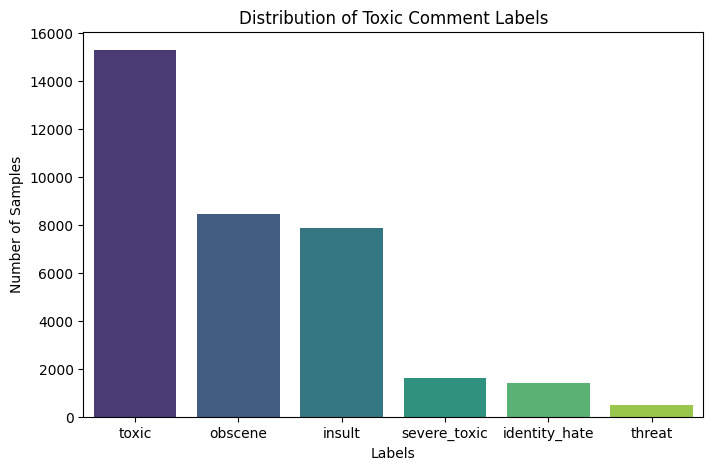

In [41]:
# list of labels
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# count distribution
label_counts = train_df[labels].sum().sort_values(ascending = False)
plt.figure(figsize =(8,5))
sns.barplot(x = label_counts.index, y = label_counts.values, palette = 'viridis')
plt.title("Distribution of Toxic Comment Labels")
plt.ylabel("Number of Samples")
plt.xlabel("Labels")
plt.show()

### Takeaway from Graph
- You can see that toxic comments dominate (≈15,000 samples), while rare categories like threat have very few (<1,000).
- This reveals class imbalance → models might learn “toxic” well but struggle with threat or identity_hate
- We may need class balancing techniques (oversampling, class weights, data augmentation).

##### **Visual 2:** Multi Label Check - Some Comments have Multiple Toxic Categories (eg: both Toxic + obscene)

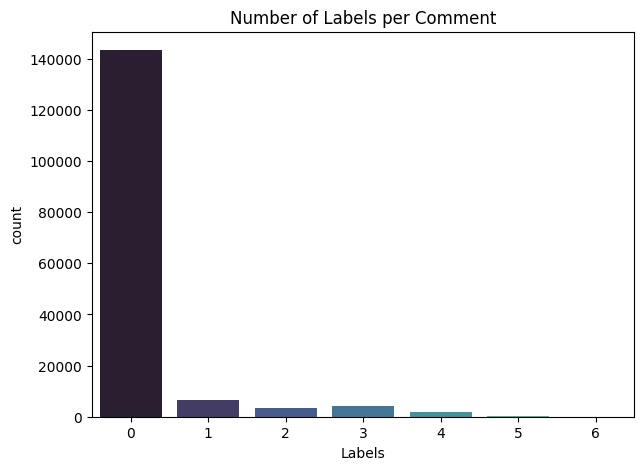

In [42]:
# How many labels per comment
train_df['num_labels'] = train_df[labels].sum(axis = 1)

plt.figure(figsize=(7,5))
sns.countplot(x = 'num_labels', data = train_df, palette = 'mako')
plt.title("Number of Labels per Comment")
plt.xlabel('Labels')
plt.show()

### Takeaway from Graph
What it shows: How many labels each comment has (multi-label distribution).

- 0 = comments with no toxic label (clean comments).

- 1 = one toxic label.

- 2, 3, … = multiple toxic categories per comment.

### Takeaway:
- Most comments are non-toxic (0).
- Some comments fall into multiple categories (e.g., both toxic + insult).
- This confirms it’s a multi-label classification problem, not single-label. That’s why we use sigmoid activation (not softmax) in deep learning.

##### **Visual 3:** Text length Distribution

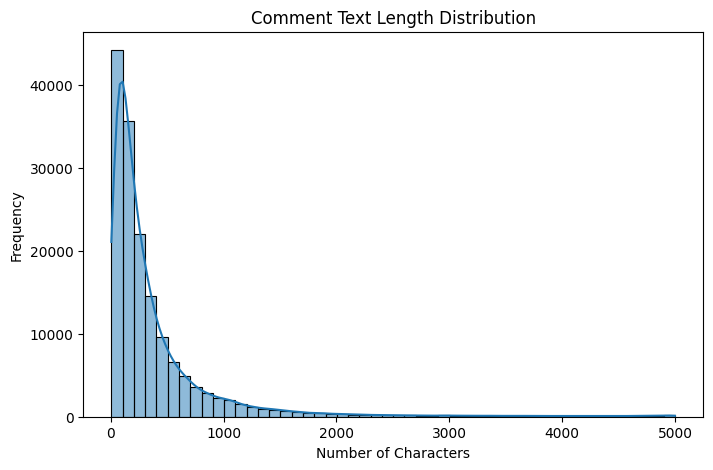

In [43]:
train_df['text_length'] = train_df['comment_text'].apply(len)

plt.figure(figsize = (8,5))
sns.histplot(train_df['text_length'], bins = 50, kde = True)
plt.title("Comment Text Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

### Takeaway from Graph
- Most comments are short (50–200 characters).
- A few very long comments exist (up to 5000 characters).
- For deep learning, we must pad/truncate sequences to a fixed length (MAX_LEN=128 or 256).This prevents outliers (very long texts) from overwhelming the model.
- Helps optimize computation: training is faster if we don’t pad up to 5000 unnecessarily.

## Step 4: Model Building

#### We’ll try classical ML first:

1) **Logistic Regression (One-vs-Rest)**

2) **Linear SVM (One-vs-Rest)**

3) **Naive Bayes**

These are lightweight, interpretable, and work well with TF-IDF features.

In [14]:
# importing relevant machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [15]:
# Features (X) and Targets (y)
X = tfidf.fit_transform(train_df['processed_comment'])
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y = train_df[labels]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
print("X_train_shape:- ",X_train.shape)
print("X_test_shape:- ",X_test.shape)
print("y_train_shape:- ",y_train.shape)
print("y_test_shape:- ",y_test.shape)

X_train_shape:-  (127656, 5000)
X_test_shape:-  (31915, 5000)
y_train_shape:-  (127656, 6)
y_test_shape:-  (31915, 6)


1) Logistic Regression (One-vs-Rest)

In [47]:
# Logistic Regression(One-vs-Rest for Multimodel)
lr = OneVsRestClassifier(LogisticRegression(max_iter=1000))
lr.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [48]:
# predictions
log_y_pred = lr.predict(X_test)

In [49]:
# Evaluation
print("Accuracy: ",accuracy_score(y_test,log_y_pred))
print("\nClassification Report:-\n ",classification_report(y_test, log_y_pred, target_names = labels))

Accuracy:  0.919880933730221

Classification Report:-
                 precision    recall  f1-score   support

        toxic       0.90      0.63      0.74      3056
 severe_toxic       0.57      0.27      0.37       321
      obscene       0.92      0.64      0.75      1715
       threat       0.60      0.08      0.14        74
       insult       0.83      0.53      0.65      1614
identity_hate       0.74      0.17      0.27       294

    micro avg       0.88      0.57      0.69      7074
    macro avg       0.76      0.38      0.49      7074
 weighted avg       0.86      0.57      0.68      7074
  samples avg       0.06      0.05      0.05      7074



2) Linear SVM (One-vs-Rest)

In [50]:
# call One-vs-Rest Linear SVM
svm = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm.fit(X,y)

OneVsRestClassifier(estimator=LinearSVC(), n_jobs=-1)

In [52]:
# make predictions
y_pred_svm = svm.predict(X_test)

In [53]:
# Evaluations
print("SVM Accuracy: ",accuracy_score(y_test,y_pred_svm))
print("\n Classification Report: \n",classification_report(y_test,y_pred_svm,target_names=labels))

SVM Accuracy:  0.9317562274792417

 Classification Report: 
                precision    recall  f1-score   support

        toxic       0.91      0.71      0.80      3056
 severe_toxic       0.77      0.36      0.49       321
      obscene       0.92      0.73      0.82      1715
       threat       0.86      0.49      0.62        74
       insult       0.86      0.63      0.73      1614
identity_hate       0.87      0.37      0.52       294

    micro avg       0.89      0.67      0.76      7074
    macro avg       0.86      0.55      0.66      7074
 weighted avg       0.89      0.67      0.76      7074
  samples avg       0.07      0.06      0.06      7074



3) Multinomial Naive Bayes

In [54]:
#Train Naive Bayes
nb = OneVsRestClassifier(MultinomialNB(), n_jobs=-1)
nb.fit(X,y)

OneVsRestClassifier(estimator=MultinomialNB(), n_jobs=-1)

In [55]:
# Make Predictions
y_pred_nb = nb.predict(X_test)

In [56]:
# Evaluations
print("Multinomial Naive Bayes Accuracy: ",accuracy_score(y_test,y_pred_nb))
print("\n Classification Report: \n",classification_report(y_test,y_pred_nb,target_names=labels))

Multinomial Naive Bayes Accuracy:  0.9146169512768291

 Classification Report: 
                precision    recall  f1-score   support

        toxic       0.92      0.54      0.68      3056
 severe_toxic       0.57      0.21      0.31       321
      obscene       0.90      0.56      0.69      1715
       threat       0.00      0.00      0.00        74
       insult       0.83      0.48      0.61      1614
identity_hate       0.59      0.09      0.16       294

    micro avg       0.88      0.49      0.63      7074
    macro avg       0.63      0.31      0.41      7074
 weighted avg       0.85      0.49      0.62      7074
  samples avg       0.05      0.04      0.04      7074



#### Baseline Models Results Comparison Table

In [57]:
# def function for evaluation and return model scores
def evaluate_model(name, model, X_test, y_test,labels):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)

    # Get Classification Report
    report = classification_report(y_test,y_pred, target_names=labels, output_dict=True)

    # Collect Key metrics
    return {
        "Model": name,
        "Accuracy": acc,
        "Precision (macro)":report['macro avg']['precision'],
        "Recall (macro)":report['macro avg']['recall'],
        "F1-Score (macro)":report['macro avg']['f1-score']
    }
   

In [58]:
# Evaluate all models
results = []
results.append(evaluate_model("Logistic Regression", lr, X_test, y_test, labels))
results.append(evaluate_model("Linear SVM", svm, X_test, y_test, labels))
results.append(evaluate_model("Multinomial NB", nb, X_test, y_test, labels))

In [59]:
# convert into dataframe
results_df = pd.DataFrame(results)

print("\nBaseline Models Results Comparison Table\n")
print(results_df, end='')


Baseline Models Results Comparison Table

                 Model  Accuracy  Precision (macro)  Recall (macro)  \
0  Logistic Regression  0.919881           0.760777        0.384583   
1           Linear SVM  0.931756           0.864377        0.550300   
2       Multinomial NB  0.914617           0.633305        0.314259   

   F1-Score (macro)  
0          0.486180  
1          0.663249  
2          0.407875  

## **Deep learning Models**, 
Here, we can capture more semantic/contextual patterns in text:

1. **BiLSTM** (handles sequential text dependencies, better than bag-of-words).

2. **CNN for Text** (captures n-gram-like patterns efficiently).

3. **Transformer (BERT fine-tuning)** (best contextual representation, handles long-range dependencies).

In [17]:
# import necessary libraries
import numpy as np
import pandas as pd
import os, pickle, json
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

1) BiLSTM Model

In [18]:
# Step 1: Data Preparation
# -----------------------------
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# train/val split
tr_df, val_df = train_test_split(train_df, test_size=0.15, random_state=42)

X_train_text = tr_df['processed_comment'].tolist()
y_train = tr_df[labels].values.astype('float32')

X_val_text = val_df['processed_comment'].tolist()
y_val = val_df[labels].values.astype('float32')

In [19]:
# Step 2: Tokenize + Pad
# -----------------------------
VOCAB_SIZE = 20000
MAX_LEN = 128

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

X_train = tokenizer.texts_to_sequences(X_train_text)
X_val = tokenizer.texts_to_sequences(X_val_text)

X_train = pad_sequences(X_train, maxlen=MAX_LEN, padding='post', truncating='post')
X_val = pad_sequences(X_val, maxlen=MAX_LEN, padding='post', truncating='post')

print("Train shape:", X_train.shape, y_train.shape)
print("Val shape:", X_val.shape, y_val.shape)

Train shape: (135635, 128) (135635, 6)
Val shape: (23936, 128) (23936, 6)


In [65]:
# Step 3: Build BiLSTM Model
# -----------------------------
def build_bilstm(vocab_size=VOCAB_SIZE, max_len=MAX_LEN, emb_dim=128, lstm_units=64, dropout=0.2, num_labels=len(labels)):
    inp = layers.Input(shape=(max_len,), dtype='int32')
    x = layers.Embedding(vocab_size, emb_dim, input_length=max_len)(inp)
    x = layers.Bidirectional(layers.LSTM(lstm_units, return_sequences=True))(x)
    x = layers.GlobalMaxPool1D()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(dropout)(x)
    out = layers.Dense(num_labels, activation='sigmoid')(x)
    
    model = models.Model(inp, out)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC(curve="PR", name="pr_auc")]
    )
    return model


In [66]:
bilstm_model = build_bilstm()
bilstm_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 128)          2560000   
                                                                 
 bidirectional (Bidirection  (None, 128, 128)          98816     
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512

In [67]:
# Step 4: Train Model
# -----------------------------
os.makedirs("saved_models", exist_ok=True)

early = callbacks.EarlyStopping(monitor='val_pr_auc', mode='max', patience=3, restore_best_weights=True)
ckpt = callbacks.ModelCheckpoint(
    "saved_models/bilstm_toxicity.h5",  # save in .h5 for deployment
    monitor='val_pr_auc', mode='max', save_best_only=True
)

history = bilstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=8,
    batch_size=64,
    callbacks=[early, ckpt],
    verbose=1
)

Epoch 1/8

2120/2120 [==============================] - 218s 101ms/step - loss: 0.0653 - pr_auc: 0.7181 - val_loss: 0.0476 - val_pr_auc: 0.8253
Epoch 2/8
2120/2120 [==============================] - 213s 100ms/step - loss: 0.0452 - pr_auc: 0.8363 - val_loss: 0.0471 - val_pr_auc: 0.8334
Epoch 3/8
2120/2120 [==============================] - 206s 97ms/step - loss: 0.0389 - pr_auc: 0.8695 - val_loss: 0.0482 - val_pr_auc: 0.8303
Epoch 4/8
2120/2120 [==============================] - 207s 97ms/step - loss: 0.0329 - pr_auc: 0.8999 - val_loss: 0.0502 - val_pr_auc: 0.8248
Epoch 5/8
2120/2120 [==============================] - 269s 127ms/step - loss: 0.0286 - pr_auc: 0.9201 - val_loss: 0.0530 - val_pr_auc: 0.8169


In [68]:
# Step 5: Save Tokenizer + Labels
# -----------------------------
with open("saved_models/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

with open("saved_models/labels.json", "w") as f:
    json.dump(labels, f)


In [69]:
# Step 6: Evaluation
# -----------------------------
y_prob = bilstm_model.predict(X_val, batch_size=256)
y_pred = (y_prob >= 0.5).astype(int)

print(classification_report(y_val, y_pred, target_names=labels, digits=4))

94/94 [==============================] - 16s 146ms/step
               precision    recall  f1-score   support

        toxic     0.8522    0.7478    0.7966      2260
 severe_toxic     0.4830    0.3156    0.3817       225
      obscene     0.7737    0.8554    0.8125      1279
       threat     0.0000    0.0000    0.0000        53
       insult     0.7346    0.7198    0.7271      1192
identity_hate     0.0000    0.0000    0.0000       227

    micro avg     0.7880    0.7091    0.7465      5236
    macro avg     0.4739    0.4397    0.4530      5236
 weighted avg     0.7448    0.7091    0.7242      5236
  samples avg     0.0621    0.0634    0.0604      5236



2) TextCNN

In [70]:
def build_textcnn(vocab_size=VOCAB_SIZE, max_len=MAX_LEN, emb_dim=100, num_labels=len(labels)):
    inp = layers.Input(shape=(max_len,))
    x = layers.Embedding(vocab_size, emb_dim, input_length=max_len)(inp)

    # Convolutional branches with different kernel sizes
    branches = []
    for k in [3, 4, 5]:
        b = layers.Conv1D(128, k, activation='relu')(x)
        b = layers.GlobalMaxPool1D()(b)
        branches.append(b)

    x = layers.Concatenate()(branches)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_labels, activation='sigmoid')(x)

    model = models.Model(inp, out)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC(curve="PR", name="pr_auc")]
    )
    return model

In [22]:
# Compute per-example sample weights (to boost rare classes)
def compute_sample_weights(y_train):
    pos = y_train.sum(axis=0)
    neg = y_train.shape[0] - pos
    per_label_pos_weight = neg / (pos + 1e-9)
    sample_weights = 1.0 + (y_train * per_label_pos_weight).sum(axis=1)
    return sample_weights, per_label_pos_weight

In [72]:
# Prepare sample weights
sample_weights, per_label_pos_weight = compute_sample_weights(y_train)
print("Per-label positive weights:", dict(zip(labels, per_label_pos_weight)))

Per-label positive weights: {'toxic': 9.406245204848856, 'severe_toxic': 98.0036496350365, 'obscene': 17.917015341701536, 'threat': 318.1411764705882, 'insult': 19.289454001495887, 'identity_hate': 114.14006791171477}


In [73]:
# Build and train model
textcnn_model = build_textcnn()
ckpt = callbacks.ModelCheckpoint("saved_models/textcnn.h5", monitor="val_pr_auc", mode="max", save_best_only=True)
early = callbacks.EarlyStopping(monitor="val_pr_auc", mode="max", patience=3, restore_best_weights=True)

history = textcnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=8,
    batch_size=64,
    callbacks=[early, ckpt],
    sample_weight=sample_weights,
    verbose=1
)

Epoch 1/8
2120/2120 [==============================] - 150s 70ms/step - loss: 2.7039 - pr_auc: 0.6363 - val_loss: 0.0941 - val_pr_auc: 0.7458
Epoch 2/8
2120/2120 [==============================] - 145s 68ms/step - loss: 2.0907 - pr_auc: 0.7484 - val_loss: 0.1011 - val_pr_auc: 0.7539
Epoch 3/8
2120/2120 [==============================] - 143s 67ms/step - loss: 1.8516 - pr_auc: 0.7747 - val_loss: 0.1052 - val_pr_auc: 0.7596
Epoch 4/8
2120/2120 [==============================] - 141s 67ms/step - loss: 1.6111 - pr_auc: 0.7971 - val_loss: 0.0867 - val_pr_auc: 0.7572
Epoch 5/8
2120/2120 [==============================] - 143s 68ms/step - loss: 1.5212 - pr_auc: 0.8064 - val_loss: 0.0888 - val_pr_auc: 0.7221
Epoch 6/8
2120/2120 [==============================] - 143s 67ms/step - loss: 1.4010 - pr_auc: 0.8170 - val_loss: 0.1182 - val_pr_auc: 0.6064


In [74]:
# Evaluation
from sklearn.metrics import classification_report

y_prob = textcnn_model.predict(X_val, batch_size=256)
y_pred = (y_prob >= 0.5).astype(int)

print(classification_report(y_val, y_pred, target_names=labels, digits=4))

94/94 [==============================] - 5s 48ms/step
               precision    recall  f1-score   support

        toxic     0.5071    0.8699    0.6407      2260
 severe_toxic     0.3375    0.4756    0.3948       225
      obscene     0.5947    0.8984    0.7157      1279
       threat     0.0751    0.6981    0.1355        53
       insult     0.4315    0.8926    0.5817      1192
identity_hate     0.3407    0.3392    0.3400       227

    micro avg     0.4726    0.8403    0.6049      5236
    macro avg     0.3811    0.6956    0.4681      5236
 weighted avg     0.4924    0.8403    0.6169      5236
  samples avg     0.0644    0.0807    0.0684      5236



3) BiGRU

In [20]:
def build_bigru(vocab_size=VOCAB_SIZE, max_len=MAX_LEN, emb_dim=128, gru_units=64, dropout=0.3, num_labels=len(labels)):
    inp = layers.Input(shape=(max_len,), dtype='int32')
    x = layers.Embedding(vocab_size, emb_dim)(inp)
    x = layers.Bidirectional(layers.GRU(gru_units, return_sequences=True))(x)
    x = layers.GlobalMaxPool1D()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(dropout)(x)
    out = layers.Dense(num_labels, activation='sigmoid')(x)
    
    model = models.Model(inp, out)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC(curve="PR", name="pr_auc")]
    )
    return model

In [23]:
# Compute sample weights (make sure compute_sample_weights() is defined earlier)
sample_weights, _ = compute_sample_weights(y_train)

# Build model
bigru_model = build_bigru()

# Callbacks
ckpt = callbacks.ModelCheckpoint(
    "saved_models/bigru.h5", monitor="val_pr_auc", mode="max", save_best_only=True
)
early = callbacks.EarlyStopping(monitor="val_pr_auc", mode="max", patience=3, restore_best_weights=True)

In [24]:
# Train
history = bigru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=8,
    batch_size=64,
    callbacks=[early, ckpt],
    sample_weight=sample_weights,
    verbose=1
)

Epoch 1/8

2120/2120 [==============================] - 197s 91ms/step - loss: 2.8828 - pr_auc: 0.5844 - val_loss: 0.1092 - val_pr_auc: 0.7964
Epoch 2/8
2120/2120 [==============================] - 186s 88ms/step - loss: 2.0228 - pr_auc: 0.7823 - val_loss: 0.0826 - val_pr_auc: 0.8075
Epoch 3/8
2120/2120 [==============================] - 206s 97ms/step - loss: 1.6843 - pr_auc: 0.8039 - val_loss: 0.0785 - val_pr_auc: 0.7661
Epoch 4/8
2120/2120 [==============================] - 191s 90ms/step - loss: 1.4754 - pr_auc: 0.8272 - val_loss: 0.0792 - val_pr_auc: 0.7995
Epoch 5/8
2120/2120 [==============================] - 186s 88ms/step - loss: 1.2966 - pr_auc: 0.8404 - val_loss: 0.0846 - val_pr_auc: 0.7691


In [26]:
# Evaluation
from sklearn.metrics import classification_report

y_prob = bigru_model.predict(X_val, batch_size=256)
y_pred = (y_prob >= 0.5).astype(int)

print(classification_report(y_val, y_pred, target_names=labels, digits=4))

94/94 [==============================] - 7s 68ms/step
               precision    recall  f1-score   support

        toxic     0.6078    0.8372    0.7043      2260
 severe_toxic     0.3956    0.5644    0.4652       225
      obscene     0.7096    0.8866    0.7883      1279
       threat     0.2403    0.5849    0.3407        53
       insult     0.6090    0.8414    0.7066      1192
identity_hate     0.3451    0.5595    0.4269       227

    micro avg     0.6012    0.8239    0.6951      5236
    macro avg     0.4846    0.7123    0.5720      5236
 weighted avg     0.6087    0.8239    0.6993      5236
  samples avg     0.0653    0.0765    0.0677      5236



3) DistilBERT

In [25]:
# import necessary libraries
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset

In [27]:
# Prepare data
labels = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
num_labels = len(labels)

# train/val split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_df["processed_comment"].tolist(),
    train_df[labels].values,
    test_size=0.15,
    random_state=42
)


In [28]:
# HuggingFace tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

In [29]:
# Ensure labels are float32 arrays
train_labels = np.array(train_labels, dtype="float32")
val_labels   = np.array(val_labels, dtype="float32")

In [30]:
# Convert to HuggingFace Dataset
train_dataset = Dataset.from_dict({
    "input_ids": train_encodings["input_ids"],
    "attention_mask": train_encodings["attention_mask"],
    "labels": train_labels.tolist()   # now float, not int
})

val_dataset = Dataset.from_dict({
    "input_ids": val_encodings["input_ids"],
    "attention_mask": val_encodings["attention_mask"],
    "labels": val_labels.tolist()     # now float, not int
})


In [31]:
# Define model (multi-label)
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(labels),
    problem_type="multi_label_classification"
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [85]:
#!pip install hf_xet

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -------------- ------------------------- 1.0/2.8 MB 7.1 MB/s eta 0:00:01
   -------------------------- ------------- 1.8/2.8 MB 5.0 MB/s eta 0:00:01
   --------------------------------- ------ 2.4/2.8 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 4.2 MB/s eta 0:00:00


In [32]:
# Training setup
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,   # safe for 8GB RAM
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss"
)

In [33]:
# Define Trainer
from sklearn.metrics import f1_score, classification_report

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = torch.sigmoid(torch.tensor(logits)).numpy()
    preds = (probs >= 0.5).astype(int)
    f1_micro = f1_score(labels, preds, average="micro")
    f1_macro = f1_score(labels, preds, average="macro")
    return {"f1_micro": f1_micro, "f1_macro": f1_macro}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


In [ ]:
# Train
trainer.train()

Epoch,Training Loss,Validation Loss


In [ ]:
# Evaluate
results = trainer.evaluate()
print(results)

In [ ]:
# Save model + tokenizer
trainer.save_model("saved_models/distilbert_toxicity")
tokenizer.save_pretrained("saved_models/distilbert_toxicity")

In [79]:
#!pip install transformers datasets accelerate -q

In [78]:
#pip install transformers==4.44.2 datasets==3.0.1 accelerate==0.34.2